# KAIST Summer Session 2018

## How to Use API_MS Face API for Movie Actors (08.30.2018)

- https://azure.microsoft.com/en-us/services/cognitive-services/face/

### 0. Data Import
- Before running this script, you need to run "M3.8 MS Face API_Image Download (Scraping)" to generate a set of images.

In [113]:
import cognitive_face as CF
import json
import requests
import pandas as pd
import time


df = pd.read_excel('naver_movie_actor.xlsx')

movie_list = []

for i in range(len(df.index)):
    movie_list.append(df.loc[i].values.tolist())

print(movie_list[0])

[169015, 1, '목격자', 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=169015', '이성민', 'https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fsstatic%2Fpeople%2Fportrait%2F201705%2F20170510002859238-6274752.jpg&type=u111_139&quality=95', '김상호', 'https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fsstatic%2Fpeople%2F14%2F201411191543315261.jpg&type=u111_139&quality=95', '진경', 'https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fsstatic%2Fpeople%2Fportrait%2F201609%2F20160926165203446-3847049.png&type=u111_139&quality=95', '곽시양', 'https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fsstatic%2Fpeople%2Fportrait%2F201707%2F20170712111807423.jpg&type=u111_139&quality=95', '박봄', 'https://search.pstatic.net/common/?src=http%3A%2F%2Fimgmovie.naver.net%2Fmdi%2Fpi%2F000004076%2FPM407677_110247_000.jpg&type=u111_139&quality=95', '김성균', 'https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fsstatic%2Fpeople%2

### 1. Setting a API Key and Endpoint URL


In [114]:
KEY = 'PLEASE REPLACE HERE AS YOUR KEY'

BASE_URL = 'PLEASE REPLACE HERE AS YOUR ENDPOINT URL'

### 2. API Request
- All APIs have relevant documents.
- See documents what parameters you can request to API.
- (Example) Face API

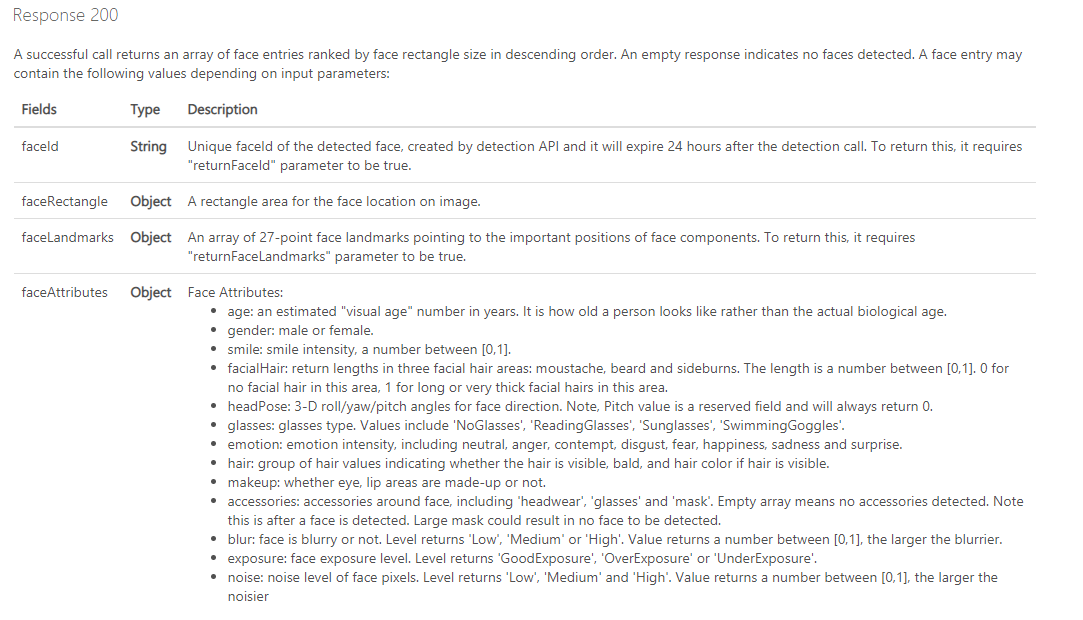
https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236

- Define the API request function.

- You can find such code on Google!

In [115]:
actor_info_collection = []

def FaceDetection(movieID, movieName, actorName, url):
    actor_info = {}
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': KEY,
    }
    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
    }
    body = {'url': url}

    response = requests.request('POST', BASE_URL + '/detect', json=body, data=None, headers=headers, params=params)
    parsed = json.loads(response.text)
    
    actor_info['movie_id'] = movieID
    actor_info['movie_name'] = movieName
    actor_info['actor_name'] = actorName
        
    try:    
        for i in range(len(parsed)):
            actor_info['age', i] = parsed[i]["faceAttributes"]['age']
            actor_info['gender', i] = parsed[i]["faceAttributes"]['gender']
            actor_info['anger', i] = parsed[i]["faceAttributes"]['emotion']['anger']
            actor_info['contempt', i] = parsed[i]["faceAttributes"]['emotion']['contempt']
            actor_info['disgust', i] = parsed[i]["faceAttributes"]['emotion']['disgust']
            actor_info['fear', i] = parsed[i]["faceAttributes"]['emotion']['fear']
            actor_info['happiness', i] = parsed[i]["faceAttributes"]['emotion']['happiness']
            actor_info['neutral', i] = parsed[i]["faceAttributes"]['emotion']['neutral']
            actor_info['sadness', i] = parsed[i]["faceAttributes"]['emotion']['sadness']
            actor_info['surprise', i] = parsed[i]["faceAttributes"]['emotion']['surprise']
   
        print(actor_info['movie_name'], actor_info['actor_name'])
        
    except Exception as e:
        print(e)
    
    
    actor_info_collection.append(actor_info)

- Most APIs limit request rates depending on your pricing.
- In Face API, a free account is possible to request up to 20 transactions per minute.
- Therefore, we limit the request rate by calling sleep function per 20 images.

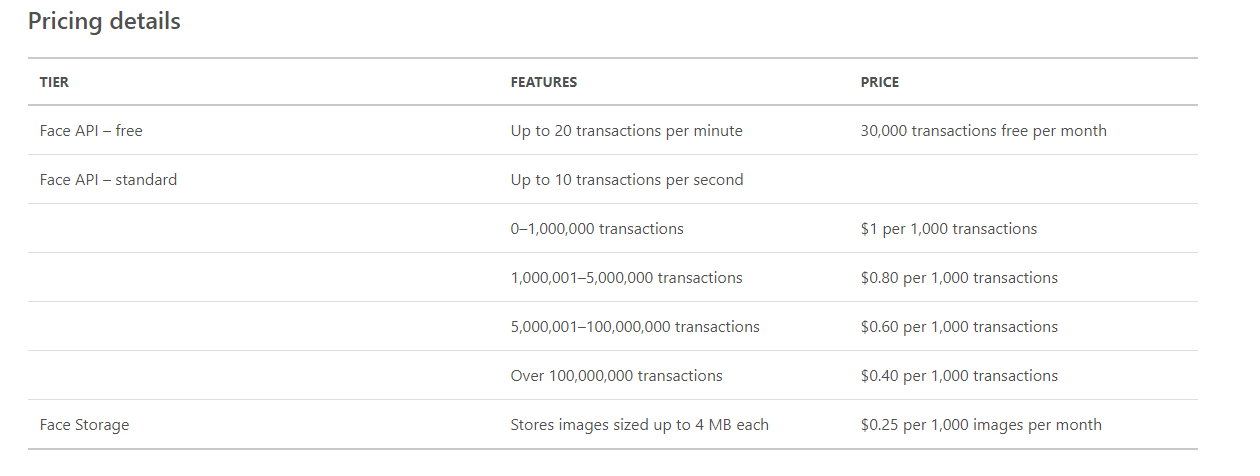
https://azure.microsoft.com/en-us/pricing/details/cognitive-services/face-api/ 

In [134]:
# Counting the number of all images
num_images = 0
for i in range(len(movie_list)):
    j = 4
    while j < len(movie_list[i]):
        if (not pd.isnull(movie_list[i][j])) and movie_list[i][j+1] != 'https://ssl.pstatic.net/static/movie/2012/06/dft_img111x139.png':
            num_images += 1
        j += 2
        

# Requesting the API for all images
num_calls = 0
print_calls = 0
for i in range(len(movie_list)):
    j = 4
    while j < len(movie_list[i]):
        if (not pd.isnull(movie_list[i][j])) and movie_list[i][j+1] != 'https://ssl.pstatic.net/static/movie/2012/06/dft_img111x139.png':
            FaceDetection(movie_list[i][0],movie_list[i][2], movie_list[i][j], movie_list[i][j+1])
            num_calls += 1
        if num_calls == 20:
            print_calls += num_calls
            print('Requested for {0:d} images ({1:.1f}%)'.format(print_calls, print_calls/num_images*100))
            print('Wait a minute...')
            num_calls = 0  
            time.sleep(65)
        j += 2

목격자 이성민
목격자 김상호
목격자 진경
목격자 곽시양
목격자 박봄
목격자 김성균
목격자 이민웅
목격자 연제욱
목격자 신승환
목격자 이재우
목격자 배정화
목격자 정유민
공작 황정민
공작 이성민
공작 조진웅
공작 주지훈
공작 김홍파
공작 정소리
공작 기주봉
공작 김응수
Requested for 20 images (3.9%)
Wait a minute...
공작 채용
공작 박진영
공작 남문철
공작 최병모
공작 김인우
공작 정기섭
공작 이승준
공작 양현민
공작 허승
공작 엄지만
공작 백승익
공작 권범택
공작 최정인
공작 김소진
공작 곽자형
공작 김지나
공작 조주희
메가로돈 제이슨 스타뎀
메가로돈 레인 윌슨
메가로돈 루비 로즈
Requested for 40 images (7.9%)
Wait a minute...
메가로돈 조문선
메가로돈 클리프 커티스
메가로돈 리빙빙
메가로돈 제시카 맥나미
메가로돈 로버트 테일러
메가로돈 마시 오카
메가로돈 올라푸르 다리 올라프손
신과함께-인과 연 하정우
신과함께-인과 연 주지훈
신과함께-인과 연 김향기
신과함께-인과 연 마동석
신과함께-인과 연 김동욱
신과함께-인과 연 조한철
신과함께-인과 연 임원희
신과함께-인과 연 남일우
신과함께-인과 연 정지훈
신과함께-인과 연 디오
신과함께-인과 연 이준혁
신과함께-인과 연 장광
신과함께-인과 연 정해균
Requested for 60 images (11.8%)
Wait a minute...
맘마미아!2 아만다 사이프리드
맘마미아!2 릴리 제임스
맘마미아!2 메릴 스트립
맘마미아!2 피어스 브로스넌
맘마미아!2 제레미 어바인
맘마미아!2 콜린 퍼스
맘마미아!2 휴 스키너
맘마미아!2 스텔란 스카스가드
맘마미아!2 조쉬 딜란
맘마미아!2 줄리 월터스
맘마미아!2 알렉사 데이비스
맘마미아!2 크리스틴 바란스키
맘마미아!2 제시카 키나 윈
맘마미아!2 도미닉 쿠퍼
맘마미아!2 셰어
맘마미아!2 앤디 가르시아
인랑 강동원
인랑 한효주
인랑 정우성
인랑 김무열
Requested for 80 images (

- Saving the data as .xlsx

In [135]:
movie_actor_df = pd.DataFrame(actor_info_collection)
movie_actor_df.to_excel('movie_actor_face detection.xlsx')